In [48]:
##### Assemble geographies covered by EU FADN
# the EU FADN geographies span multiple NUTS regions in multiple countries
# this script creates one layer which is the regions included in the FADN

import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [49]:
##### Load data

# Get the current working directory
cd = os.path.dirname(os.getcwd())

# Import data
NUTS = gpd.read_file('/Users/carinamanitius/Documents/Data/Admin_Boundaries/EU_NUTS/NUTS_RG_20M_2021_3035.gpkg')

NUTS_match = pd.read_csv("/Users/carinamanitius/Documents/Data/Admin_Boundaries/EU_FADN/FADN_region_NUTS_codes.csv")

# Set save path
save_path = '/Users/carinamanitius/Documents/Data/Admin_Boundaries/EU_FADN/EU_FADN_2021_regions.shp'

In [50]:
##### Filter to regions included 

NUTS = NUTS[NUTS['NUTS_ID'].isin(NUTS_match['NUTS_ID'])]

# split into regions to merge and regions not to merge

list_to_merge = [
    "DE6","DEF","UKC","UKE","UKG","UKD","UKF","UKK","UKH","UKJ",
    "EL51","EL62","EL53","EL41","EL52","EL63","EL54","EL42","EL65","EL43","EL64",
    "PT11","PT16D","PT16E","PT16F","PT16G","PT16H","PT16I","PT16J","PT17","PT15","PT20","PT16B","PT18",
    "PY30",
    "FI1B1","FI193","FI194","FI1D7","SE1","SE31","FI1C","FI1D1","FI195","FI1D8","SE2","SE32","FI1D2","FI196","FI1D9","FI1D3","FI197","FI1D5",
    "HU32","HU33",
    "PL42","PL22","PL43","PL21","PL6","PL41","PL7","PL82","PL51","PL81","PL84","PL52","PL92",
    "HR02","HR05","HR06"
]

NUTS_to_merge = NUTS[NUTS['NUTS_ID'].isin(list_to_merge)]
NUTS_no_merge = NUTS[~NUTS['NUTS_ID'].isin(list_to_merge)]

In [51]:
NUTS_no_merge.columns

Index(['NUTS_ID', 'LEVL_CODE', 'CNTR_CODE', 'NAME_LATN', 'NUTS_NAME',
       'MOUNT_TYPE', 'URBN_TYPE', 'COAST_TYPE', 'geometry'],
      dtype='object')

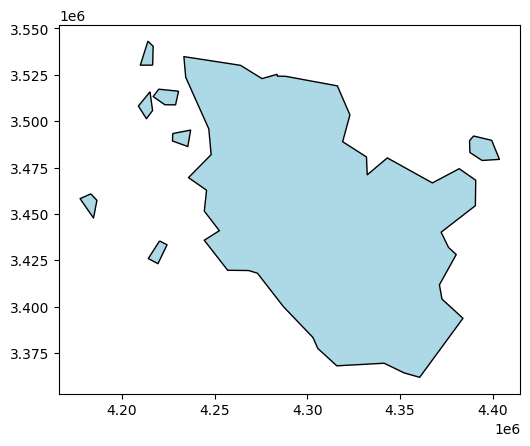

In [53]:
##### Merge regions that need to be merged 

col_to_keep = ['FADN_code','FADN_name_2020', 'FADN_ID_2020', 'geometry']

# Germany
DE_15 = NUTS_to_merge[NUTS_to_merge['NUTS_ID'].isin(['DE6', 'DEF'])]

DE_15 = DE_15.dissolve(as_index=False)
DE_15 = DE_15.reset_index(drop=True)


DE_15['FADN_code'] = 15
DE_15['FADN_name_2020'] = 'Schleswig-Holstein/Hamburg'
DE_15['FADN_ID_2020'] = '(15) Schleswig-Holstein/Hamburg'

DE_15 = DE_15.loc[:, col_to_keep]

In [27]:
DE_15

,geometry,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FADN_code,FADN_name_2020,FADN_ID_2020
0,"MULTIPOLYGON (((4303112.1 3383356.251, 4287046...",DE6,1,DE,Hamburg,Hamburg,0.0,0,0,15,Schleswig-Holstein/Hamburg,(15) Schleswig-Holstein/Hamburg
